In [12]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [13]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
import pickle
import datetime
import numpy as np
from cycler import cycler
import os.path
import './cdlc/modelresults.py' as mres

SyntaxError: invalid syntax (<ipython-input-21-564aaa045344>, line 6)

In [15]:
class LossValues(object):
    def __init__(self):
        self.x = []
        self.y1 = []
        self.y2 = []
        self.mean = []

In [35]:
def plotLossWordvec(compType,lr,momentum,epoch,batchSize):
    lossVal = LossValues()
    #loss-values0.00100-0.20-100-200.bin
    lrStr = ("%2.15f" % lr).rstrip('0')
    momentumStr = ("%2.15f" % momentum).rstrip('0')
    fname = ("./%s-loss-values-%s-%s-%d-%d.bin" % (compType,lrStr,momentumStr,epoch,batchSize))
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    #lossVal = pickle.load( open( "./loss-values0.20.bin", "rb" ) )
    lossVal = pickle.load( open( fname, "rb" ) )
    print("pmin %2.4f - smin %2.4f - mmin %2.4f" % (np.amin(lossVal.y1),np.amin(lossVal.y2),np.amin(lossVal.mean)))
    plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
    plt.plot(np.array(lossVal.x[0:100]), np.array(lossVal.y1[0:100]))
    plt.plot(np.array(lossVal.x[0:100]), np.array(lossVal.y2[0:100]))
    plt.plot(np.array(lossVal.x[0:100]), np.array(lossVal.mean[0:100]))
    plt.legend(['pri', 'sec', 'mean'], loc='upper right')
    head = ("%s-Loss Fcn %s-%s" % (compType,lrStr,momentumStr))
    plt.title(head)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

pmin 0.0311 - smin 0.0382 - mmin 0.0653


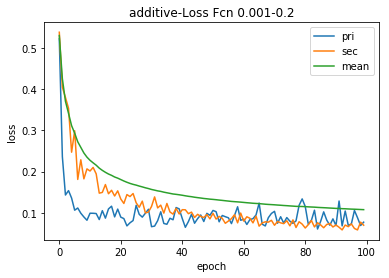

In [36]:
momentlist = [0.2]
lrlist = [1e-3]
batchSize=100
epoch=100
compType = "additive"
for mmt in momentlist:
    for lr in lrlist:
        plotLossWordvec(compType,lr,mmt,epoch,batchSize)

In [9]:
momentlist = [0.2]
lrlist = [1e-3]
batchSize=100
epoch=100
compType = "tanh"
for mmt in momentlist:
    for lr in lrlist:
        plotLossWordvec(compType,lr,mmt,epoch,batchSize)

file not found - ./tanh-loss-values-0.001-0.2-100-100.bin 


In [ ]:
    lossVal = []
    momentlist=[0.3]
    lrlist= [1e-12]
    epoch = 100
    i = 0
    plt.close('all')
    f, axarr = plt.subplots(len(momentlist)*len(lrlist)+1,sharex=True, sharey=True,figsize=(15,100))
    for momentum in momentlist:
        for lr in lrlist:
            lrS = ("%2.15f" % lr).rstrip('0')
            fname = 'cdlc-loss-values-%s-%2.3f-%d.bin' % (lrS,momentum,epoch)
            if os.path.isfile(fname) == False:
                continue
            lossVal = pickle.load( open( fname, "rb" ) )
            lenVal = len(lossVal)
            lnt=lenVal
            #lnt = 1500
            mn = min(np.array(lossVal[0:lnt-1]))
            mx = max(np.array(lossVal[0:lnt-1]))
            mean = np.mean(lossVal[0:lnt-1])
            axarr[i].plot(np.array(range(0,lnt-1)), np.array(lossVal[0:lnt-1]))
            head = 'cdlc lr=%s mnt=%2.3f epoch=%d min=%f max=%f mean=%f' % (lrS,momentum,epoch,mn,mx,mean)
            axarr[i].set_title(head)
            #axarr[i].xlabel('epoch')
            #axarr[i].ylabel('loss')
            i+=1


In [245]:
def plotLossCdlc(compType,lr,momentum,epoch,maxSent,size):
    lossVal = LossValues()
    lrStr = ("%2.15f" % lr).rstrip('0')
    momentumStr = ("%2.3f" % momentum).rstrip('0')
    fname = ("./%s-rnn-cdlc-loss-values-%s-%s-%d-%d.bin" % (compType,lrStr,momentumStr,maxSent,epoch))
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.x)
    lnt=lenVal
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y1[0:lnt-1]))
    mx = max(np.array(lossVal.y1[0:lnt-1]))
    lrStr = ("%2.0e" % lr).rstrip('0')
    head = 'cdlc lr=%s mnt=%s epoch=%d sntc=%d min=%f max=%f' % (lrStr,momentumStr,epoch,maxSent,mn,mx)
    plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y1[0:lnt-1]))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.mean[0:lnt-1]))
    plt.legend(['err','mean'], loc='upper right')
    plt.title(head)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()


./additive-rnn-cdlc-loss-values-0.01-0.2-50-5.bin


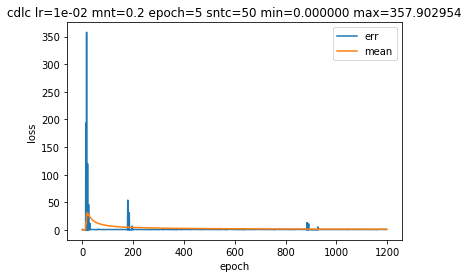

./additive-rnn-cdlc-loss-values-0.01-0.2-100-5.bin


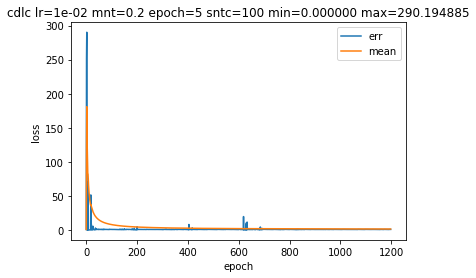

./additive-rnn-cdlc-loss-values-0.01-0.2-150-5.bin


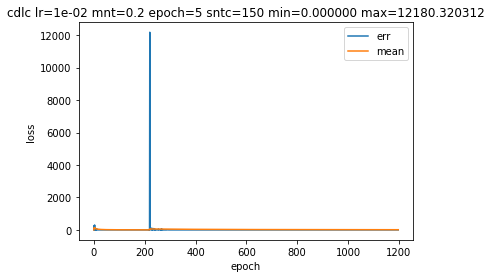

./additive-rnn-cdlc-loss-values-0.001-0.2-50-5.bin


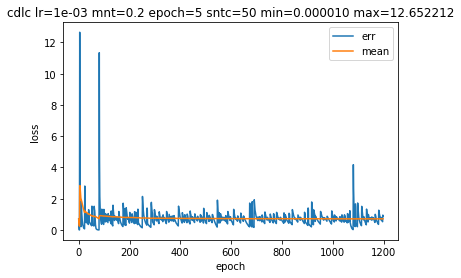

./additive-rnn-cdlc-loss-values-0.001-0.2-100-5.bin


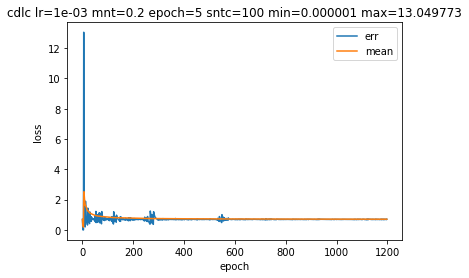

./additive-rnn-cdlc-loss-values-0.001-0.2-150-5.bin


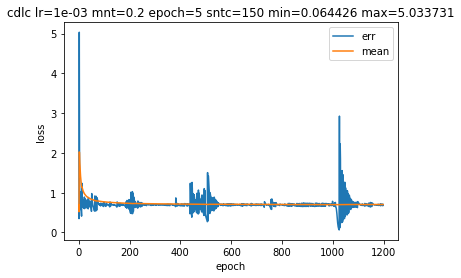

./additive-rnn-cdlc-loss-values-0.0001-0.2-50-5.bin


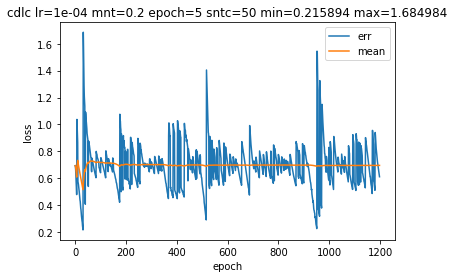

./additive-rnn-cdlc-loss-values-0.0001-0.2-100-5.bin


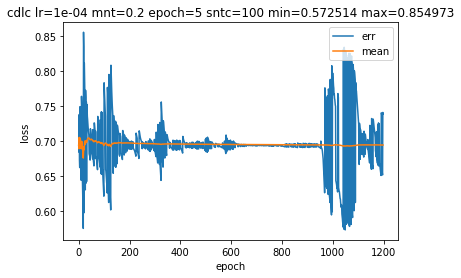

./additive-rnn-cdlc-loss-values-0.0001-0.2-150-5.bin


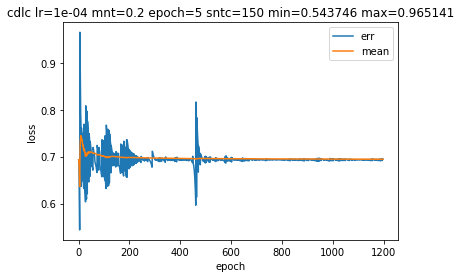

./additive-rnn-cdlc-loss-values-0.00001-0.2-50-5.bin


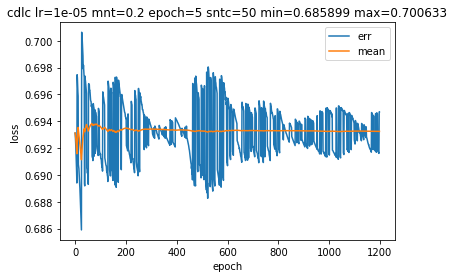

./additive-rnn-cdlc-loss-values-0.00001-0.2-100-5.bin


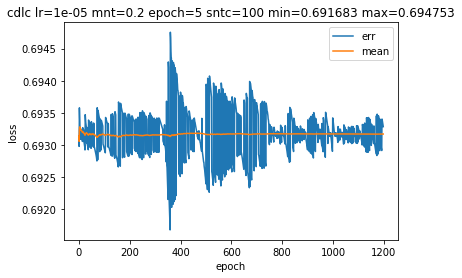

./additive-rnn-cdlc-loss-values-0.00001-0.2-150-5.bin


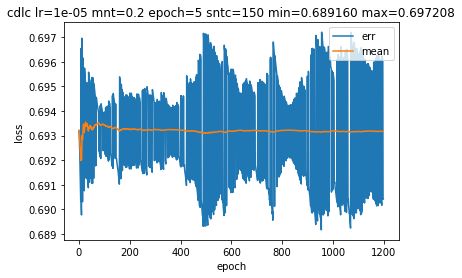

./additive-rnn-cdlc-loss-values-0.000001-0.2-50-5.bin


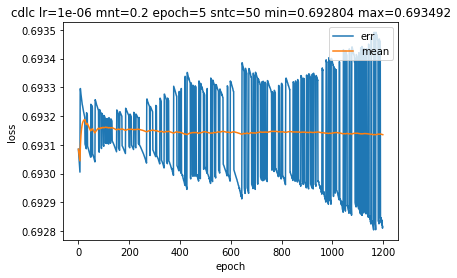

./additive-rnn-cdlc-loss-values-0.000001-0.2-100-5.bin


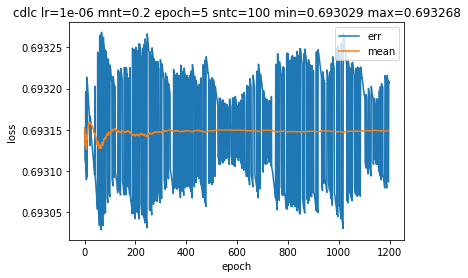

./additive-rnn-cdlc-loss-values-0.000001-0.2-150-5.bin


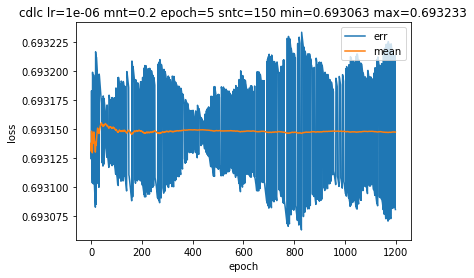

./additive-rnn-cdlc-loss-values-0.0000001-0.2-50-5.bin


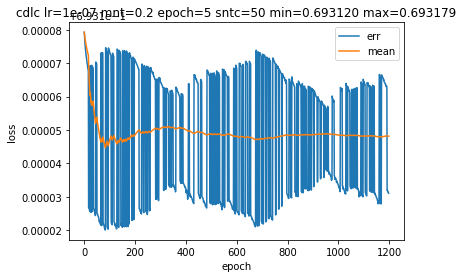

./additive-rnn-cdlc-loss-values-0.0000001-0.2-100-5.bin


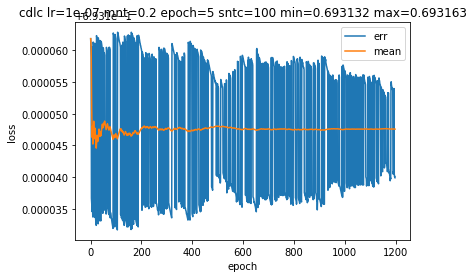

./additive-rnn-cdlc-loss-values-0.0000001-0.2-150-5.bin


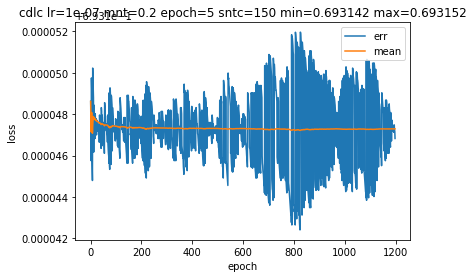

./additive-rnn-cdlc-loss-values-0.01-0.3-50-5.bin


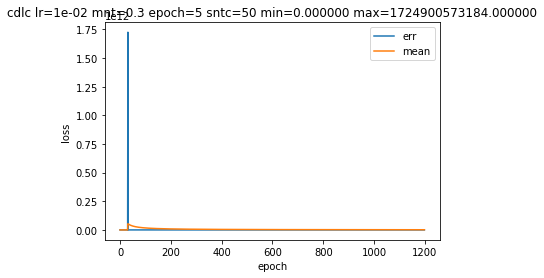

./additive-rnn-cdlc-loss-values-0.01-0.3-100-5.bin


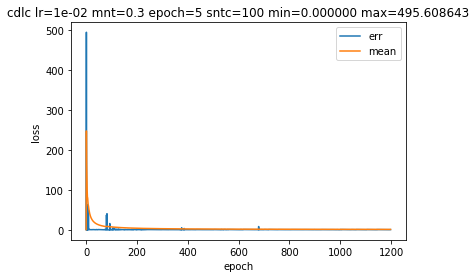

./additive-rnn-cdlc-loss-values-0.01-0.3-150-5.bin


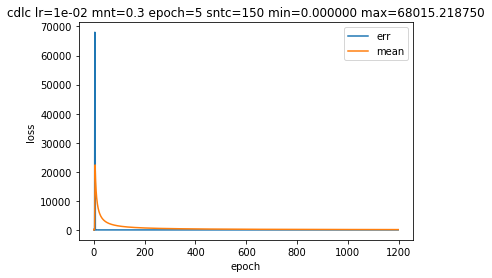

./additive-rnn-cdlc-loss-values-0.001-0.3-50-5.bin


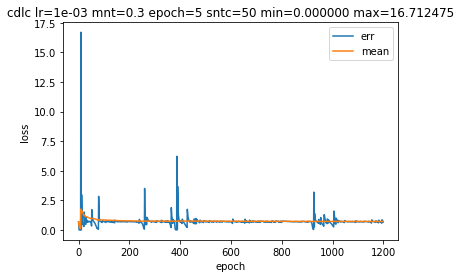

./additive-rnn-cdlc-loss-values-0.001-0.3-100-5.bin


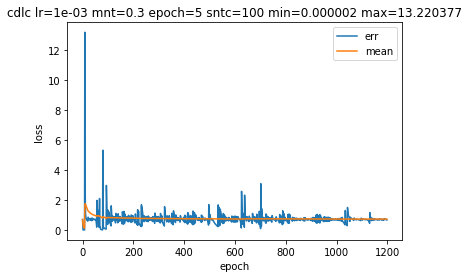

./additive-rnn-cdlc-loss-values-0.001-0.3-150-5.bin


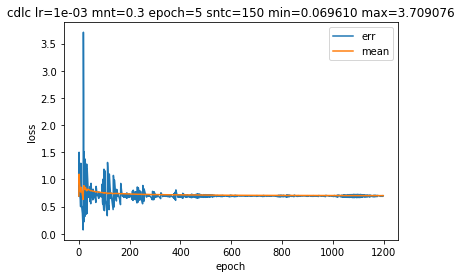

./additive-rnn-cdlc-loss-values-0.0001-0.3-50-5.bin


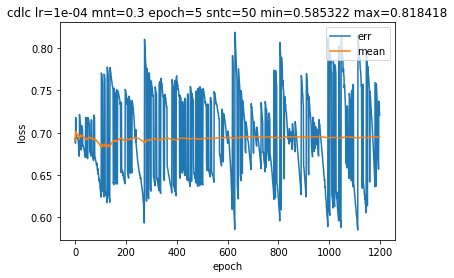

./additive-rnn-cdlc-loss-values-0.0001-0.3-100-5.bin


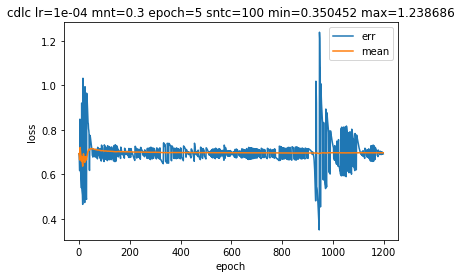

./additive-rnn-cdlc-loss-values-0.0001-0.3-150-5.bin


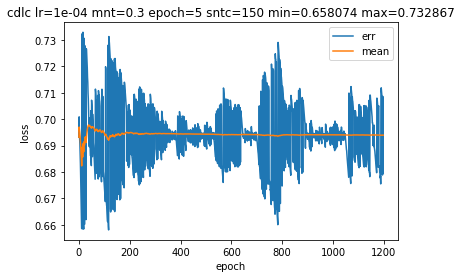

./additive-rnn-cdlc-loss-values-0.00001-0.3-50-5.bin


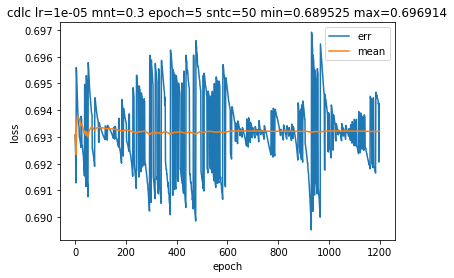

./additive-rnn-cdlc-loss-values-0.00001-0.3-100-5.bin


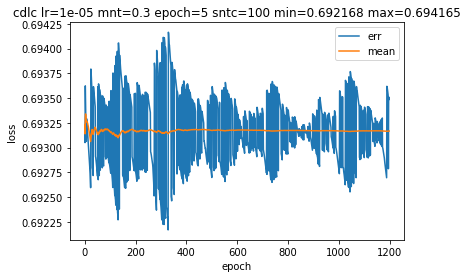

./additive-rnn-cdlc-loss-values-0.00001-0.3-150-5.bin


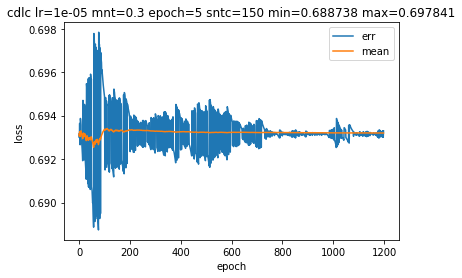

./additive-rnn-cdlc-loss-values-0.000001-0.3-50-5.bin


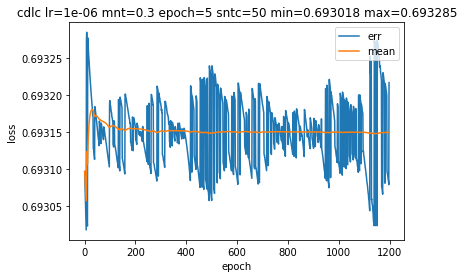

./additive-rnn-cdlc-loss-values-0.000001-0.3-100-5.bin


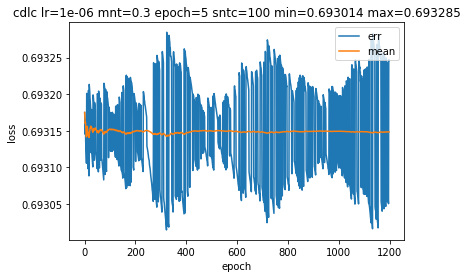

./additive-rnn-cdlc-loss-values-0.000001-0.3-150-5.bin


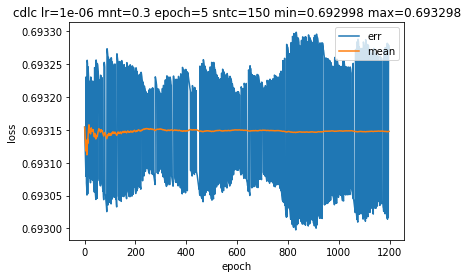

./additive-rnn-cdlc-loss-values-0.0000001-0.3-50-5.bin


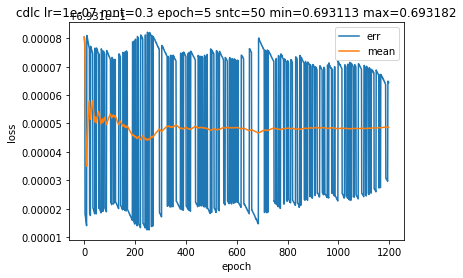

./additive-rnn-cdlc-loss-values-0.0000001-0.3-100-5.bin


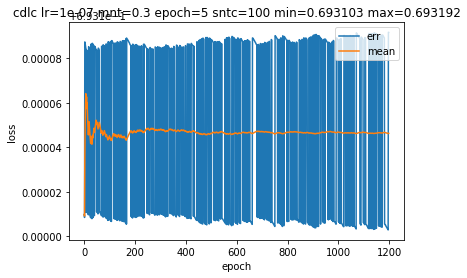

./additive-rnn-cdlc-loss-values-0.0000001-0.3-150-5.bin


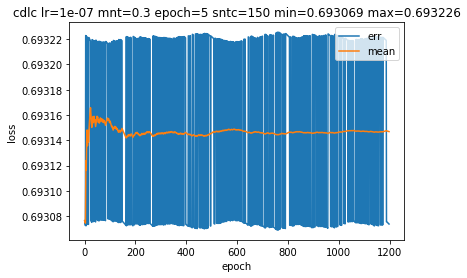

./additive-rnn-cdlc-loss-values-0.01-0.4-50-5.bin


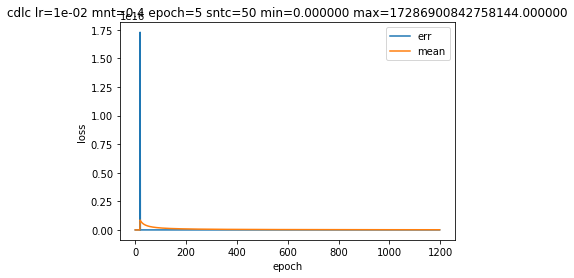

./additive-rnn-cdlc-loss-values-0.01-0.4-100-5.bin


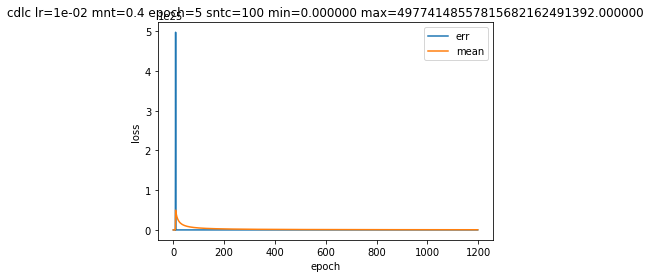

./additive-rnn-cdlc-loss-values-0.01-0.4-150-5.bin


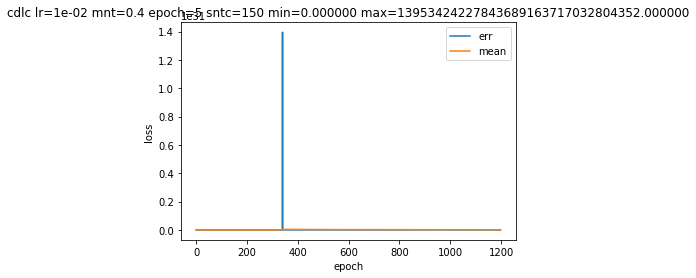

./additive-rnn-cdlc-loss-values-0.001-0.4-50-5.bin


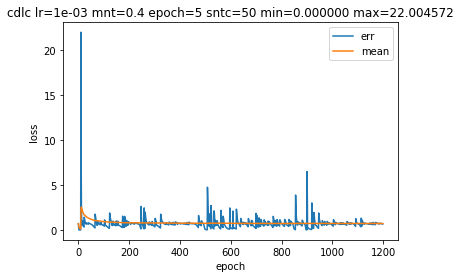

./additive-rnn-cdlc-loss-values-0.001-0.4-100-5.bin


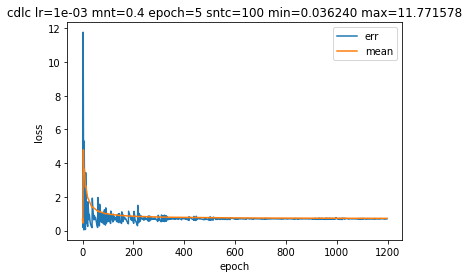

./additive-rnn-cdlc-loss-values-0.001-0.4-150-5.bin


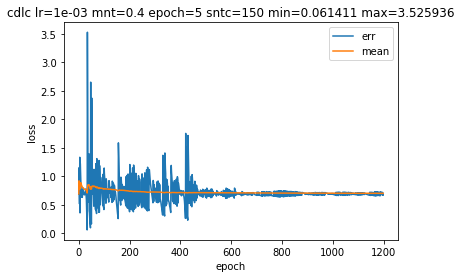

./additive-rnn-cdlc-loss-values-0.0001-0.4-50-5.bin


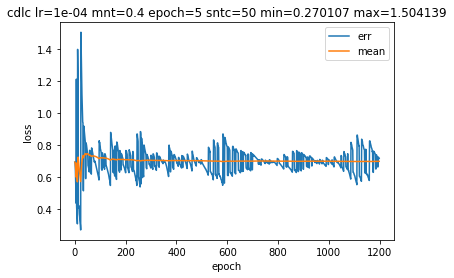

./additive-rnn-cdlc-loss-values-0.0001-0.4-100-5.bin


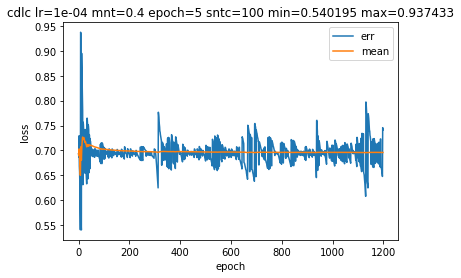

./additive-rnn-cdlc-loss-values-0.0001-0.4-150-5.bin


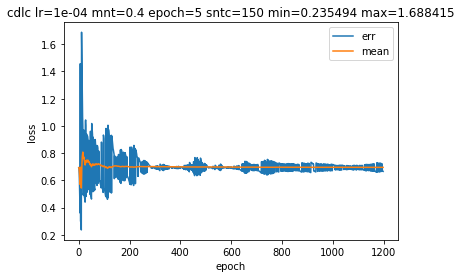

./additive-rnn-cdlc-loss-values-0.00001-0.4-50-5.bin


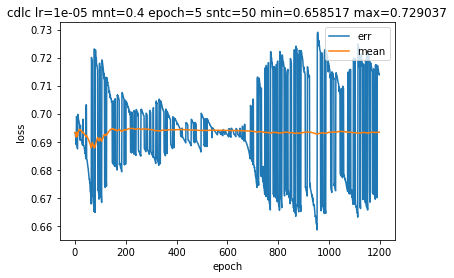

./additive-rnn-cdlc-loss-values-0.00001-0.4-100-5.bin


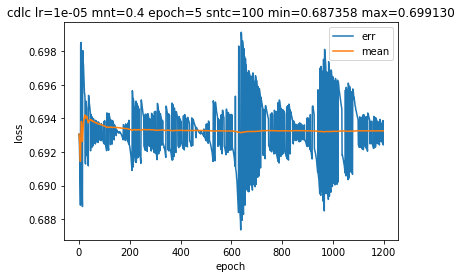

./additive-rnn-cdlc-loss-values-0.00001-0.4-150-5.bin


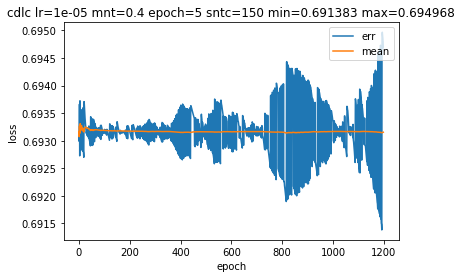

./additive-rnn-cdlc-loss-values-0.000001-0.4-50-5.bin


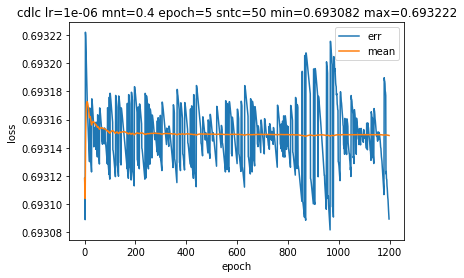

./additive-rnn-cdlc-loss-values-0.000001-0.4-100-5.bin


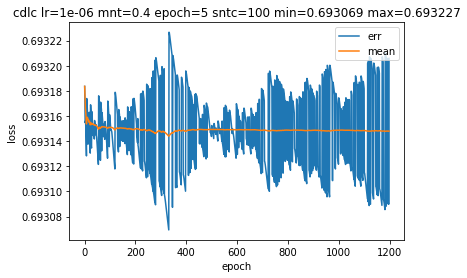

./additive-rnn-cdlc-loss-values-0.000001-0.4-150-5.bin


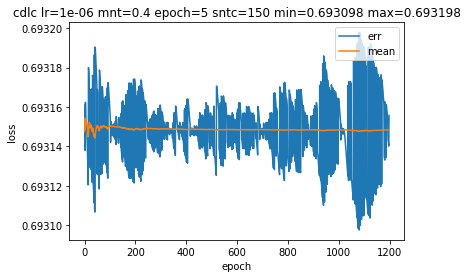

./additive-rnn-cdlc-loss-values-0.0000001-0.4-50-5.bin


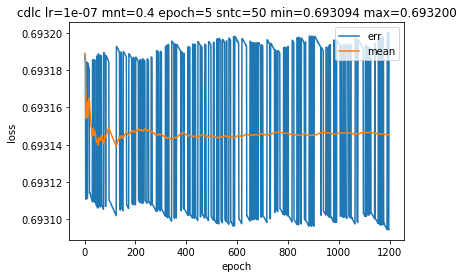

./additive-rnn-cdlc-loss-values-0.0000001-0.4-100-5.bin


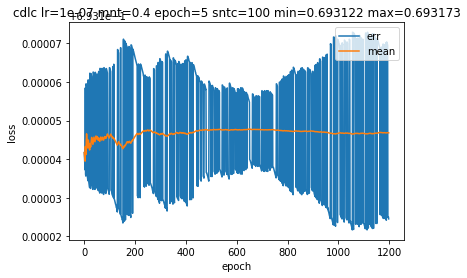

./additive-rnn-cdlc-loss-values-0.0000001-0.4-150-5.bin


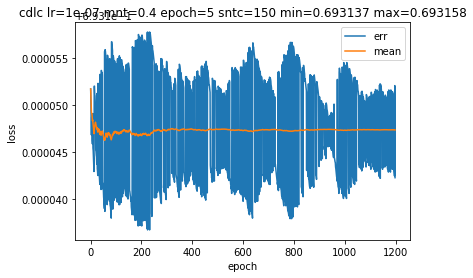

In [254]:
momentumlist = [0.2,0.3,0.4]
lrlist= [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
max_sent_list = [50,100,150]
epochlist= [5]
size=0
compType = "additive"
for momentum in momentumlist:
    for lr in lrlist:
        for epoch in epochlist:
            for max_sent in max_sent_list:
                plotLossCdlc(compType,lr,momentum,epoch,max_sent,size)


In [16]:
def plotLossCdlc(fname,head,size):
    lossVal = LossValues()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.x)
    lnt=lenVal
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y1[0:lnt-1]))
    mx = max(np.array(lossVal.y1[0:lnt-1]))
    plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y1[0:lnt-1]))
    plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.mean[0:lnt-1]))
    plt.legend(['err','mean'], loc='upper right')
    plt.title(head)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()


In [17]:
fname = './cdlc/tanh-lstm-docwindow-cdlc-loss-values-0.001-0.5-1-10-10.bin'
head = 'cdlc lr=0.001 mnt=0.5 epoch=1 10 10'
plotLossCdlc(fname,head,0)

./cdlc/tanh-lstm-docwindow-cdlc-loss-values-0.001-0.5-1-10-10.bin


ImportError: No module named 'modelresults'